### [Isotonic Regression](https://scikit-learn.org/stable/modules/isotonic.html)
- Fits a non-decreasing function to 1D data. If minimizes $\sum_i w_i (y_i - \hat{y}_i)^2$ where the weights $w_i$ are all positive, and both `x` and `y` are real values.
- `increasing` changes the constraint to $\hat{y}_i \ge \hat{y}_j$ when $X_i \le X_j$. `increasing="auto"` chooses a constraint based on [Spearman's rank correlation coefficient (Wikipedia)](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection as LC

from sklearn.linear_model import LinearRegression as LR
from sklearn.isotonic import IsotonicRegression as IR
from sklearn.utils import check_random_state as CRS

In [2]:
n  = 100
x  = np.arange(n)
rs = CRS(0)
y  = rs.randint(-50, 50, size=(n,)) + 50. * np.log1p(np.arange(n))

In [3]:
ir = IR(out_of_bounds="clip")
y_ = ir.fit_transform(x, y)
lr = LR()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

LinearRegression()

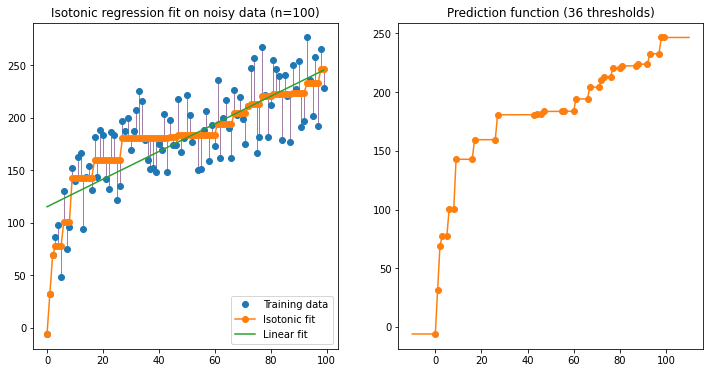

In [4]:
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc       = LC(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

ax0.plot(x, y, 'C0.', markersize=12)
ax0.plot(x, y_, 'C1.-', markersize=12)
ax0.plot(x, lr.predict(x[:, np.newaxis]), 'C2-')
ax0.add_collection(lc)

ax0.legend(('Training data', 'Isotonic fit', 'Linear fit'), 
           loc='lower right')
ax0.set_title('Isotonic regression fit on noisy data (n=%d)' 
              % n)

x_test = np.linspace(-10, 110, 1000)
ax1.plot(x_test, ir.predict(x_test), 'C1-')
ax1.plot(ir.X_thresholds_, 
         ir.y_thresholds_, 
         'C1.', markersize=12)
ax1.set_title("Prediction function (%d thresholds)" % 
              len(ir.X_thresholds_))

plt.show()